# Analisis preliminar del conjunto de datos

In [161]:
#Importaciones
import pandas as pd
import numpy as np

#Para llamar a archivos de otras carpetas
import sys
sys.path.append('..')

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [162]:
#Después importamos el archivo de funciones ('sp_limpieza.py') 
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

<module 'src.sp_limpieza' from 'c:\\Users\\pooo_\\Desktop\\Hackio\\proyecto_final_troncal\\analisis_eda_proyecto_final\\jupyters\\..\\src\\sp_limpieza.py'>

In [163]:
#Para interactuar con el sistema operativo
import os
#Devuelve la ruta del directorio actual
print(os.getcwd())

c:\Users\pooo_\Desktop\Hackio\proyecto_final_troncal\analisis_eda_proyecto_final\jupyters


In [164]:
#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformación y limpieza de datos

### 1.1. Importación y visión general de los datos

In [165]:
#Leer los archivos
df_attendance = pd.read_csv("../data/data_raw/attendance.csv", index_col = 0)
df_homework = pd.read_csv("../data/data_raw/homework.csv", index_col = 0)
df_performance = pd.read_csv("../data/data_raw/performance.csv", index_col = 0)
df_students = pd.read_csv("../data/data_raw/students.csv", index_col = 0)
df_communication = pd.read_csv("../data/data_raw/communication.csv", index_col = 0)

In [166]:
#Ver dataframe 'df_attendace'
df_att_preliminar =  sp.eda_preliminar(df_attendance)

,Date,Subject,Attendance_Status
Student_ID,,,
S09367,2024-09-24,Science,excused
S11335,2025-02-26,Science,PRESENT
S06743,2024-09-10,Science,left early
S02035,2024-07-21,History,excused
S01575,2024-11-11,Geography,Absent


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 364680 entries, S06592 to S12134
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               364680 non-null  object
 1   Subject            364680 non-null  object
 2   Attendance_Status  364680 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB


None

____________________________
NULOS


Date                 0.0
Subject              0.0
Attendance_Status    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(347112)

____________________________
DESCRIBE


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
VALUE COUNTS
Date
2024-12-31    1075
2024-05-05    1073
2024-09-06    1070
2024-08-06    1068
2024-09-22    1068
              ... 
2024-12-25     922
2024-05-09     921
2024-03-31     919
2024-12-07     917
2024-04-21     905
Name: count, Length: 366, dtype: int64
Subject
Math         61241
Science      60881
Arabic       60749
English      60684
Geography    60640
History      60485
Name: count, dtype: int64
Attendance_Status
PRESENT       45982
Absent        45751
Present       45632
Late          45509
 late         45508
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64
____________________________


In [167]:
#Quitar los espacios y pasar a misnuculas las tabla
df_attendance = sp.valores_a_minus(df_attendance)
df_attendance.sample(10)

,date,subject,attendance_status
student_id,,,
s08839,2024-09-15,science,late
s09864,2024-10-03,arabic,present
s03530,2025-02-02,science,left early
s03443,2024-08-13,arabic,left early
s01694,2024-05-13,history,present
s06910,2024-05-28,english,absent
s06810,2024-07-20,math,late
s11092,2024-06-28,arabic,late
s09592,2024-07-08,science,present


In [168]:
#Ver en la columna attendance_status que valores tiene.
conteo = df_attendance['attendance_status'].value_counts()
conteo

attendance_status
present       91614
late          91017
absent        45751
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64

In [169]:
#Corregimos el valor 'absnt' por 'absent' y comprobamos los resultados de la columna
df_attendance['attendance_status'] = df_attendance['attendance_status'].replace('absnt','absent')

conteo = df_attendance['attendance_status'].value_counts()
conteo
#Ya tenemos los valores de esta columna corregidos.

attendance_status
present       91614
absent        91229
late          91017
left early    45435
excused       45385
Name: count, dtype: int64

In [170]:
#Cambiar nombre de columna 'date' para hacerla mas descriptiva y 'attendace_status' para hacerla mas corta.
df_attendance.rename(columns={'date':'att_date', 'attendance_status':'att_status'}, inplace= True)

In [171]:
# Como la columna 'date' es de tipo 'Object' vamos a pasarla a tipo Datetime y comprobamos el tipo de dato que sea correcto
df_attendance['att_date'] = pd.to_datetime(df_attendance['att_date'], errors = 'coerce')
print(df_attendance['att_date'].dtype)

datetime64[ns]


In [172]:
#Comprobamos el resto de columnas que sean de tipo correcto.
print(df_attendance.dtypes)

att_date      datetime64[ns]
subject               object
att_status            object
dtype: object


In [173]:
#Ver dataframe 'df_homework'
df_hw_preliminar =  sp.eda_preliminar(df_homework)
df_hw_preliminar

,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
Student_ID,,,,,,
S00600,Arabic,Smile.,2024-10-20,❌,C-,Yes
S09909,Arabic,Yeah agreement we.,09/13/2024,not done,A,
S06507,Math,Buy gas.,10/02/2024,✔,B,No
S06243,Math,Key entire.,02/13/2025,❌,A+,
S11205,Science,Base record.,2024-12-09,not done,C,


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, S12002 to S08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             60780 non-null  object
 1   Assignment_Name     60780 non-null  object
 2   Due_Date            60780 non-null  object
 3   Status              60780 non-null  object
 4   Grade_Feedback      60780 non-null  object
 5   Guardian_Signature  60780 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


None

____________________________
NULOS


Subject               0.0
Assignment_Name       0.0
Due_Date              0.0
Status                0.0
Grade_Feedback        0.0
Guardian_Signature    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
VALUE COUNTS
Subject
English      10209
Geography    10179
Science      10112
History      10110
Arabic       10106
Math         10064
Name: count, dtype: int64
Assignment_Name
Also.                      15
Term.                      15
Understand.                13
Not.                       13
Eye.                       12
                           ..
Effect job amount.          1
Study indicate fight.       1
Reach whose investment.     1
Suggest figure.             1
Involve determine.          1
Name: count, Length: 56065, dtype: int64
Due_Date
2025-01-23    315
2025-03-02    302
2024-11-06    301
2024-11-08    300
2024-12-25    299
             ... 
11/04/2024     52
10/13/2024     51
12/21/2024     50
11/22/2024     50
03/01/2025     46
Name: count, Length: 366, dtype: int64
Status
 Done       10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64
Grade_Feedback
A+    7709
B-    7639

In [174]:
#Pasar dataframe a minusculas
df_homework = sp.valores_a_minus(df_homework)
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s02514,math,bar work.,2025-03-03,✔,f,
s06586,geography,professor reason color.,2024-12-11,pending,f,yes
s09813,arabic,almost quickly.,02/18/2025,✔,d,yes
s01863,history,expect decision join.,2025-01-03,pending,a,
s08021,math,medical charge.,2024-12-09,done,d,
s10717,geography,style.,10/12/2024,done,c,no
s06551,science,way international room.,2024-12-01,not done,f,yes
s09786,english,help window.,2024-11-13,not done,b,
s11988,english,charge pay.,2024-11-22,✔,f,


In [175]:
#La columna 'due_date' tiene valores de fecha con diferentes formatos.
# Hay que pasarlo a un formato y asignalo como de tipo datetime.

df_homework['due_date'] = pd.to_datetime(df_homework['due_date'], errors='coerce')
df_homework.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, s12002 to s08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   subject             60780 non-null  object        
 1   assignment_name     60780 non-null  object        
 2   due_date            48422 non-null  datetime64[ns]
 3   status              60780 non-null  object        
 4   grade_feedback      60780 non-null  object        
 5   guardian_signature  60780 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.2+ MB


In [176]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s02300,english,interest benefit.,NaT,pending,c,no
s04147,math,site consumer difficult.,2024-11-03,done,d,no
s09999,geography,certainly fund.,2024-11-12,❌,c-,no
s00675,geography,tonight leave.,2025-03-04,❌,d,
s11667,math,over its.,NaT,not done,c,
s06245,english,worker industry choice.,2024-10-14,not done,f,no
s07088,arabic,they.,NaT,pending,d,yes
s04200,math,begin thing.,NaT,not done,f,
s04639,history,lay upon.,2024-10-28,pending,b,yes


In [177]:
#Sacar nulos de la columna 'due_date' mediante funcion de sp.limpieza.py
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject                   0
assignment_name           0
due_date              12358
status                    0
grade_feedback            0
guardian_signature        0
dtype: int64, subject                0.00
assignment_name        0.00
due_date              20.33
status                 0.00
grade_feedback         0.00
guardian_signature     0.00
dtype: float64)


In [178]:
#🔴🔴PUEDE QUE ESTA FUNCION NO SEA NECESARIA AQUI,PROBARLA EN OTRO DATAFRAME
#Comprobamos mediante esta funcion tambien como la columna 'due_date' rebasa el umbral 10. 

high_nulls_colmn, low_nulls_colmn = sp.nulos_umbral(df_homework)
print(high_nulls_colmn)

,Column,Datatype,NullsCount,Nulls%
0,due_date,datetime64[ns],12358,20.332346


['due_date']


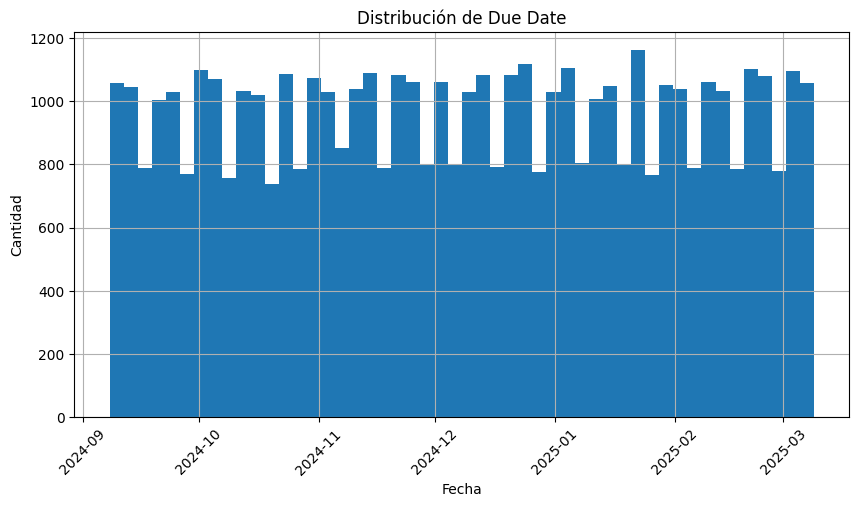

In [179]:
#🔴🔴 VALORAR SI ESTO MERECE O ME QUEDO SOLO CON LA CELDA DE ABAJO, QUE PONE --> describe().
# La columna 'due_date' tiene una cantidad elevada de nulos (20.33%) por lo que antes de imputarla comprobamos
#como es la distribución de sus valores para poder así valorar si imputar los nulos, si por media, moda o mediana.

df_homework['due_date'].hist(bins=50, figsize=(10,5))
plt.title('Distribución de Due Date')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [180]:
print(df_homework['due_date'].describe())

count                            48422
mean     2024-12-08 09:02:43.710710016
min                2024-09-08 00:00:00
25%                2024-10-24 00:00:00
50%                2024-12-09 00:00:00
75%                2025-01-23 00:00:00
max                2025-03-09 00:00:00
Name: due_date, dtype: object


In [181]:
#Dado que las fechas están bastante centradas en torno a finales de 2024, lo más razonable sería:
# Imputar con la mediana (50%), que es 2024-12-09, ya que la mediana es robusta frente a outliers y nos va a evitar 
# en caso de haber un par de fechas raras que el resultado no se distorsione demasiado.

mediana_fecha = df_homework['due_date'].median()
df_homework['due_date'].fillna(mediana_fecha, inplace= True)


C:\Users\pooo_\AppData\Local\Temp\ipykernel_6196\3655258861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['due_date'].fillna(mediana_fecha, inplace= True)


In [182]:
#Comprobamos que los nulos han desaparecido
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject               0
assignment_name       0
due_date              0
status                0
grade_feedback        0
guardian_signature    0
dtype: int64, subject               0.0
assignment_name       0.0
due_date              0.0
status                0.0
grade_feedback        0.0
guardian_signature    0.0
dtype: float64)


In [183]:
#Para coregir la columna 'status' vamos a comprobar primero el tipo de valores que tiene.

status_valores = df_homework['status'].value_counts()
status_valores

status
done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64

In [184]:
#Vamos a homogeinizar esos valores. 

mapeo_status = {
    '✅':'done',
    '❌':'not done',
    '✔':'done',
    'pending':'pending',
    'done':'done',
    'not done':'not done',
}

df_homework['status'] = df_homework['status'].replace(mapeo_status)

status_valores = df_homework['status'].value_counts()
status_valores


status
done        30381
not done    20385
pending     10014
Name: count, dtype: int64

In [185]:
#Debemos comprobar la columna 'guardian_signatura' ya que tiene campos vacíos que pandas
# lo detecta como cadena de texto vacía.
valores = df_homework['guardian_signature'].value_counts()
print(valores)

guardian_signature
no     20372
yes    20348
       20060
Name: count, dtype: int64


In [186]:
#Debemos de convertir la cadena vacia por nulos de numpy. Después vamos a comprobar cuantos nulos son.
df_homework['guardian_signature'] = df_homework['guardian_signature'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_homework['guardian_signature'])
ver_nulos

(np.int64(20060), np.float64(33.0))

In [187]:
#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts(dropna=False, normalize=True)*100)

guardian_signature
no     33.517604
yes    33.478118
NaN    33.004278
Name: proportion, dtype: float64


In [188]:
#Hay un 33% de nulos de la columna 'guardian_signature' por tanto vamos a ver sus cuartiles, media etc.
print(df_homework['guardian_signature'].describe())

count     40720
unique        2
top          no
freq      20372
Name: guardian_signature, dtype: object


In [189]:
#Vamos a imputar los nulos con 'unknown' ya que así no modificamos artificialmente la proporción original y
# dejamos constancia de que falta esta información.

df_homework['guardian_signature'].fillna('unknown', inplace = True)

#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts())

guardian_signature
no         20372
yes        20348
unknown    20060
Name: count, dtype: int64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_6196\2920811997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['guardian_signature'].fillna('unknown', inplace = True)


In [190]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s05184,english,nearly provide fact represent.,2024-12-07,done,a,yes
s02617,history,environment idea personal.,2024-12-09,pending,d,unknown
s11234,geography,seek note a.,2024-12-09,not done,d,no
s05198,english,result republican our.,2025-02-16,done,a,unknown
s02762,history,include thus power.,2025-01-06,done,f,no
s09581,geography,film character.,2024-12-02,not done,d,yes
s02311,math,address begin often.,2024-11-22,not done,b-,unknown
s04508,geography,effort check four.,2024-09-14,done,d,unknown
s00695,math,everything human.,2024-12-09,pending,a+,unknown


In [191]:
#Ver dataframe 'df_communication'
df_comm_preliminar =  sp.eda_preliminar(df_communication)
df_comm_preliminar

,Date,Message_Type,Message_Content
Student_ID,,,
S11178,2024-09-18,Parent to Teacher,Culture serious report drive street meet song ...
S10536,2024-11-29,Parent to Teacher,Opportunity many up next join ok over call sto...
S05723,2025-01-06,Teacher to Parent,Various parent during its next center week exp...
S10866,2024-11-11,Teacher to Parent,Beyond history father change sound course hour...
S08052,2024-11-11,Automated Reminder,Claim discuss technology discover partner patt...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 24312 entries, S01133 to S03501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             24312 non-null  object
 1   Message_Type     24312 non-null  object
 2   Message_Content  24312 non-null  object
dtypes: object(3)
memory usage: 759.8+ KB


None

____________________________
NULOS


Date               0.0
Message_Type       0.0
Message_Content    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(737)

____________________________
DESCRIBE


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
VALUE COUNTS
Date
2025-02-18    164
2024-12-27    163
2025-03-02    163
2024-10-24    157
2024-10-06    156
             ... 
2024-09-20    110
2024-12-03    108
2024-10-10    108
2025-02-22    107
2024-11-21    103
Name: count, Length: 183, dtype: int64
Message_Type
Teacher to Parent     8149
Automated Reminder    8106
Parent to Teacher     8057
Name: count, dtype: int64
Message_Content
                                                                                                                                                            1227
Than far indeed gun doctor concern hear whose policy people board traditional.                                                                                 1
Than time unit nearly wrong man blue probably yes season civil car later both from those.                                                                      1
Around positive side your city top common pretty again agent.                                    

In [192]:
df_communication = sp.valores_a_minus(df_communication)
df_communication.sample(10)

,date,message_type,message_content
student_id,,,
s09348,2025-02-03,parent to teacher,pick customer gun important clearly four envir...
s02891,2024-10-23,automated reminder,civil former finish particularly when authorit...
s11436,2025-01-28,teacher to parent,audience impact this chair coach expert heavy ...
s04896,2024-11-07,automated reminder,rule hair this bag produce draw seem fact form...
s05154,2024-10-01,parent to teacher,treatment road decision himself allow perhaps ...
s02049,2024-09-15,parent to teacher,fly head world so chair none yourself right de...
s07070,2024-12-15,teacher to parent,detail kind door whole simple determine produc...
s04503,2024-12-15,automated reminder,ever throw paper environmental interesting rem...
s08563,2025-02-09,automated reminder,method beautiful partner any draw suffer momen...


In [193]:
#Cambiar el nombre de date a uno mas descriptivo y convertirlo a tipo datetime
df_communication.rename(columns={'date':'date_message'}, inplace=True)

df_communication['date_message'] = pd.to_datetime(df_communication['date_message'], errors = 'coerce')
print(df_communication['date_message'].dtype)

datetime64[ns]


In [194]:
#Comprobar los valores que hay en la columna 'date_message'
print(df_communication['message_type'].value_counts())

message_type
teacher to parent     8149
automated reminder    8106
parent to teacher     8057
Name: count, dtype: int64


In [195]:
#Viendo la columna 'message_content' a través de la funcion eda_preliminar parece que hay campos vacíos (cadenas de texto vacías)
# que no figuran como nulos.

df_communication['message_content'] = df_communication['message_content'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_communication['message_content'])
ver_nulos
#No son muchos los nulos de la columna, solo un 5.05. Se puede proceder a simplemente eliminar estas filas o no.
#🔴 Dejar así en nan los valores, imputarlos a 'no_message' o eliminarlas?


(np.int64(1227), np.float64(5.05))

In [196]:
df_prfm_preliminar = sp.eda_preliminar(df_performance)
df_prfm_preliminar

,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
Student_ID,,,,
S02926,History,103,95,Wind growth scientist yard bit add.
S09143,Arabic,88,95,
S10182,Arabic,65,95,
S06691,Geography,84,-5,Top wear daughter detail media together exist ...
S00212,Science,42,-5,


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 36468 entries, S00396 to S09604
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Subject                36468 non-null  object
 1   Exam_Score             36468 non-null  int64 
 2   Homework_Completion_%  36468 non-null  object
 3   Teacher_Comments       36468 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


None

____________________________
NULOS


Subject                  0.0
Exam_Score               0.0
Homework_Completion_%    0.0
Teacher_Comments         0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(1858)

____________________________
DESCRIBE


,count,mean,std,min,25%,50%,75%,max
Exam_Score,36468.0,74.964243,20.538704,40.0,57.0,75.0,93.0,110.0


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,36468,6,Arabic,6224
Homework_Completion_%,36468,5,95,7453
Teacher_Comments,36468,32918,,3551


____________________________
VALUE COUNTS
Subject
Arabic       6224
Science      6093
Geography    6082
English      6043
Math         6035
History      5991
Name: count, dtype: int64
Homework_Completion_%
95      7453
-5      7376
100%    7296
80%     7283
90      7060
Name: count, dtype: int64
Teacher_Comments
                                                                             3551
Including describe event yet middle assume rest any pick whatever oil.          1
Set factor safe fine fast population including.                                 1
Between current hotel west recognize believe hand on poor ball wonder.          1
Probably specific science memory her stand since main.                          1
                                                                             ... 
Environmental newspaper close story space season detail.                        1
Music tend or occur know development see.                                       1
Car the choice college consume

In [197]:
df_performance = sp.valores_a_minus(df_performance)
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s11438,science,99,90,today raise represent audience american sell e...
s01953,geography,58,80%,help your note fear stay house raise such brot...
s02018,science,87,100%,city beautiful president wind ball low sometim...
s06429,english,74,100%,because rich perhaps market grow time issue fr...
s08633,arabic,41,-5,goal everybody common body popular federal gro...
s11117,arabic,84,100%,trade animal only talk usually thing rather ag...
s02905,geography,42,80%,pass first well pm gun experience strong away.
s08997,math,64,-5,memory shoulder strong crime such son change m...
s08453,english,51,-5,


In [ ]:
#🟡🟡VER COMO SACAR LOS OUTLIERS
# Outliers en 'exam_score'. 

# Supongamos que df_performance es tu DataFrame y la columna 'Exam_Score' es la que te interesa.
# Calcular cuartiles
Q1 = df_performance['exam_score'].quantile(0.25)
Q3 = df_performance['exam_score'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_performance[(df_performance['exam_score'] < lower_limit) | (df_performance['exam_score'] > upper_limit)]

# Mostrar los outliers
print(outliers)

# Para ver los valores fuera de los límites
print(f"Límites Inferior: {lower_limit}, Límites Superior: {upper_limit}")


Empty DataFrame
Columns: [subject, exam_score, homework_completion_%, teacher_comments]
Index: []
Límites Inferior: 3.0, Límites Superior: 147.0


In [ ]:
#🟡🟡VER COMO CALCULAR EL PROCENTAJE DE OUTLIERS PARA SABER QUE HACER
# Calcular el porcentaje de outliers superiores e inferiores
total = len(df_performance)
outliers_inferiores = len(df_performance[df_performance['exam_score'] < lower_limit])
outliers_superiores = len(df_performance[df_performance['exam_score'] > upper_limit])

# Calcular los porcentajes
porcentaje_outliers_inferiores = (outliers_inferiores / total) * 100
porcentaje_outliers_superiores = (outliers_superiores / total) * 100

print(f"Porcentaje de outliers inferiores: {porcentaje_outliers_inferiores:.2f}%")
print(f"Porcentaje de outliers superiores: {porcentaje_outliers_superiores:.2f}%")


Porcentaje de outliers inferiores: 0.00%
Porcentaje de outliers superiores: 0.00%


In [ ]:
#🟡🟡Que los outliers no pasen de 100 ni sean inferiores a 0. 

In [200]:
def limpiar_homework_completion(x):
    """
    Limpia y convierte los valores de 'homework_completion_%' a números. Elimina el '%' de las cadenas y convierte a `float`. 
    Los valores negativos se convierten en 0 y los mayores a 100 se ajustan a 100.

    Parámetros:
    x (str, int, float): Valor a limpiar y convertir.

    Devuelve:
    float: Valor entre 0 y 100, o None si hay un error.
    """
    try:
        if isinstance(x, str) and '%' in x:
            x = float(x.replace('%', '').strip())
        elif isinstance(x, str):
            x = float(x.strip())
        elif isinstance(x, (int, float)):
            x = float(x)
        else:
            return None
        
        if x < 0:
            x = 0
        elif x > 100:
            x = 100
        return x
    except:
        return None

# Verificamos primero existencia de la columna antes de limpiar
if 'homework_completion_%' in df_performance.columns:
    # Limpiamos la columna 'homework_completion_%' directamente 
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(limpiar_homework_completion)
    # Convertimos los valores a formato porcentaje
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(lambda x: f"{round(x)}%" if x is not None else None)
    print("Columna 'homework_completion_%' limpiada correctamente.")
else:
    print("La columna 'homework_completion_%' no existe en df_performance.")


Columna 'homework_completion_%' limpiada correctamente.


In [202]:
#Comprobamos que los valores de la columna 'homework_completion_%' sean consistentes
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s10489,english,85,80%,feeling affect television television would che...
s09936,arabic,41,0%,door young food him they vote fish away whole ...
s09744,english,56,100%,cost last environment like role administration...
s00992,english,78,0%,movie glass million process let tough opportun...
s10887,english,54,95%,audience process lose health attention sport a...
s07680,english,91,80%,somebody sense important goal part far.
s11013,geography,90,80%,since pattern sell sound work discuss fill tri...
s06807,history,107,80%,shoulder reach after serious fight majority tr...
s11672,arabic,60,0%,


In [ ]:
#Los campos vacíos de la columna 'teacher_comments' pasarlos a nulos para saber cuantos hay.np
df_performance['teacher_comments'] = df_performance['teacher_comments'].replace('', np.nan)

# Contar valores nulos en la columna 'teacher_comments'
nulos = sp.nulos_num_porcentaje(df_performance['teacher_comments'])
nulos


(np.int64(3551), np.float64(9.74))

In [208]:
#Imputar las filas que tienen nulos (un 9.74%) ya que no queremos
# perder el resto de información de esas filas.

df_performance['teacher_comments'] = df_performance['teacher_comments'].fillna('No comment')

df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s04555,science,52,0%,see what stay create able fact office.
s08571,geography,50,90%,oil allow democrat under be kitchen name she a...
s07702,math,81,95%,child although law foreign suddenly compare pr...
s02867,science,59,90%,No comment
s01790,history,74,0%,finally feeling behind well describe material ...
s04467,english,76,80%,college recognize citizen view personal cost y...
s01843,english,100,95%,course wall choose wind audience vote.
s07836,math,53,95%,perform represent conference professor leader ...
s01758,history,46,80%,oil tv able this book beautiful.


In [211]:
df_std_preliminar = sp.eda_preliminar(df_students)
df_std_preliminar

,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
Student_ID,,,,
S03268,Erica Zuniga,01-16-2015,Grade 4,(985)273-6680
S02322,Laurie Brown,2018-01-16,Grade 5,490-345-9220
S05242,Wendy Rodriguez,2013-12-28,Grade 1,(332)914-3120x52571
S11906,Wanda Griffith,2009-05-06,Grade 2,932.218.9180
S02248,Denise Warren,2014-09-16,Grade 4,+1-685-747-5485x0261


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 12156 entries, S00001 to S12156
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full_Name          12156 non-null  object
 1   Date_of_Birth      12156 non-null  object
 2   Grade_Level        12156 non-null  object
 3   Emergency_Contact  11538 non-null  object
dtypes: object(4)
memory usage: 474.8+ KB


None

____________________________
NULOS


Full_Name            0.00
Date_of_Birth        0.00
Grade_Level          0.00
Emergency_Contact    5.08
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
VALUE COUNTS
Full_Name
Michael Smith     6
Michael Lewis     5
Michelle Smith    5
Angela Harris     5
James Smith       4
                 ..
Beth Stephens     1
Ryan Robinson     1
Juan Mccoy        1
Denise Patton     1
Keith Wood        1
Name: count, Length: 11442, dtype: int64
Date_of_Birth
2013-11-29    10
2011-06-10     9
2017-04-17     9
2011-06-04     9
2006-03-11     8
              ..
2008-09-21     1
2018-01-10     1
2010-11-12     1
2010-08-30     1
2015-07-29     1
Name: count, Length: 5350, dtype: int64
Grade_Level
Grade 5    2472
Grade 4    2454
Grade 3    2447
Grade 2    2400
Grade 1    2383
Name: count, dtype: int64
Emergency_Contact
3793041001              1
781-534-4258x9046       1
(635)437-6131           1
(270)269-1173x5503      1
625.766.1101            1
                       ..
706.708.0421x412        1
+1-933-864-5644x501     1
+1-794-484-8495x7772    1
306-771-1524x116        1
308.517.3750            1
Name: count, Length: 115

In [ ]:
df_students = sp.valores_a_minus(df_students)
df_students.sample(10)

,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s02117,bailey guzman,2016-01-09,grade 4,NaN
s03460,emily marsh,05-22-2018,grade 3,001-257-710-6434x54688
s06469,kristen avery,2008-04-10,grade 4,(314)494-6600x491
s05884,jamie martin,2017-08-04,grade 4,001-465-396-8759x89957
s05882,adam campbell,07-26-2011,grade 2,+1-465-801-6684x55973
s06050,amanda harris,2006-10-02,grade 2,262-500-3589
s05101,lori turner,2015-06-11,grade 1,626-843-9773
s05214,matthew perez,2014-09-03,grade 1,001-560-214-5359x2835
s06591,betty payne,2015-04-14,grade 4,2593137977


In [ ]:
#🟡🟡 pasar la columna date_of_birth al formato correcto, hacer una funcion GENERAL del DATE
# para esta correccion y la anterior en el sp_limpieza.py

In [ ]:
#🟡🟡 contar los nulos de emergency_contact y valorr que hacer con ellos.

### 1.2. Eliminar columnas redundantes o irrelevantes

### 1.3. Homogeinizar los nombres de las columnas

### 1.4. Homogeinizar datos categóricos

### 1.5. Cambio tipo de datos y gestión de nulos

### 1.6. Combinar ambas tablas

# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico 

# 3. Visualización de los datos.

### 3.1. Histogramas para la distribución de variables numéricas

### 3.2. Boxplots para detectar outliers

### 3.3. Gráficos de barras para variables categóricas

### 3.4. Heatmap de correlaciones

# 4. Guardar archivos limpios